# Medical Cost Regression Analysis

# Name : Markus Filaskoski

## About the Dataset
- Link to dataset on Kaggle: [Medical Cost Personal Datasets](https://www.kaggle.com/datasets/mirichoi0218/insurance)
- Description of columns:
    - `age`: Age of primary beneficiary
    - `sex`: Insurance contractor gender (female, male)
    - `bmi`: Body mass index
    - `children`: Number of children covered by health insurance / Number of dependents
    - `smoker`: Smoking status
    - `region`: Residential area in the US (northeast, southeast, southwest, northwest)
    - `charges`: Individual medical costs billed by health insurance

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")

df = pd.read_csv("data.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Exploratory Data Analysis (EDA)

In [6]:
df.info()
df.describe()
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

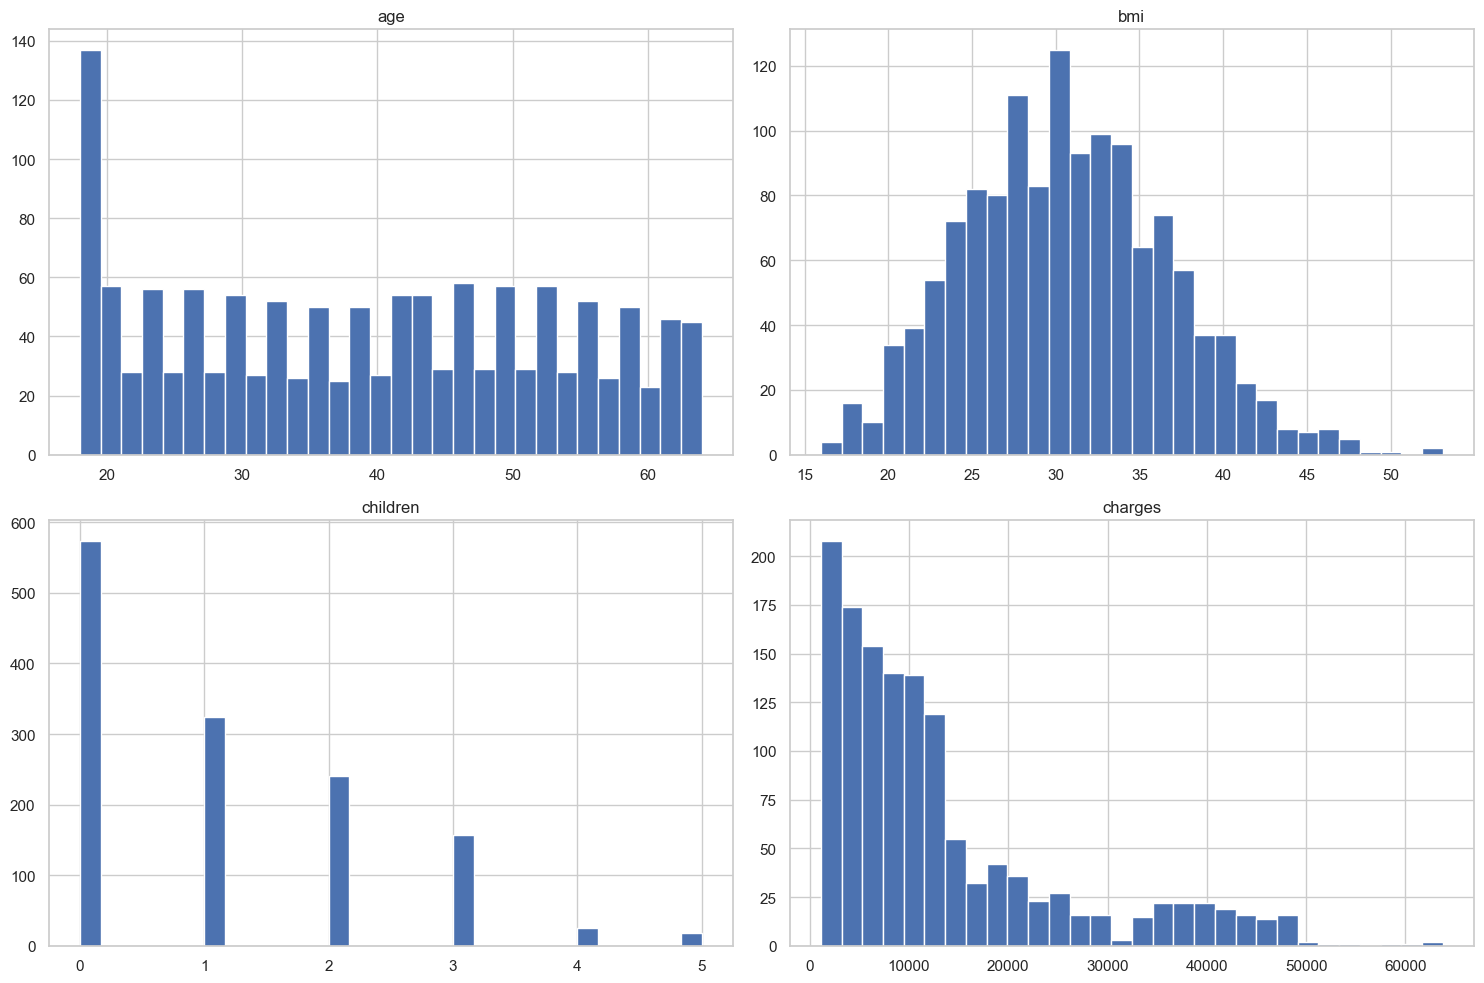

In [8]:
import matplotlib.pyplot as plt
df.hist(bins=30, figsize=(15,10))
plt.tight_layout()
plt.show()

<Figure size 1000x800 with 0 Axes>

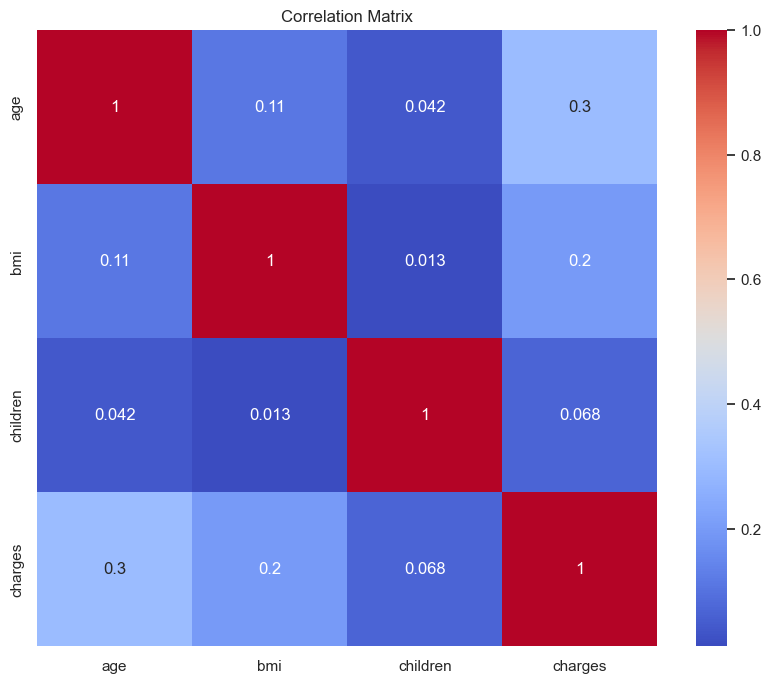

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=["float64", "int64"])

corr_matrix = numeric_df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

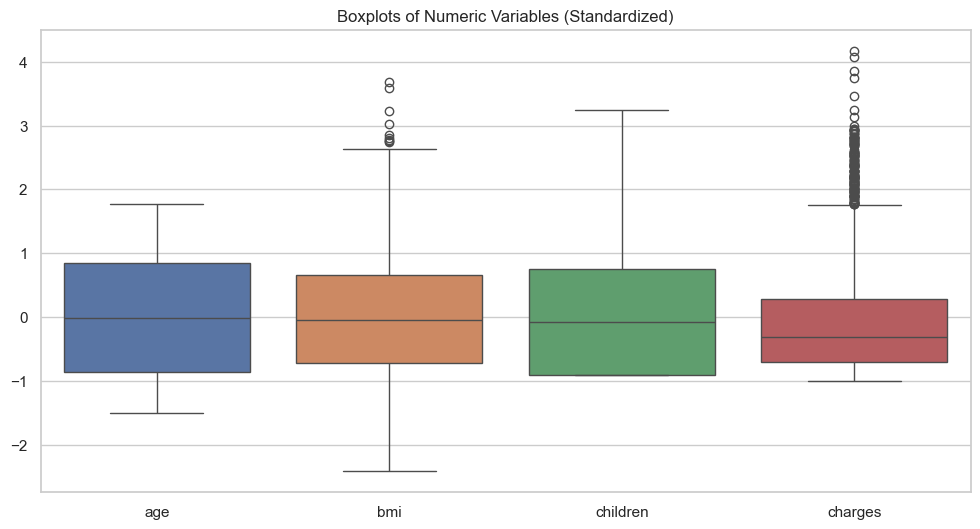

In [65]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

scaled_df = pd.DataFrame(scaled_data, columns=numeric_df.columns)

plt.figure(figsize=(12,6))
sns.boxplot(data=scaled_df)
plt.title("Boxplots of Numeric Variables (Standardized)")
plt.show()

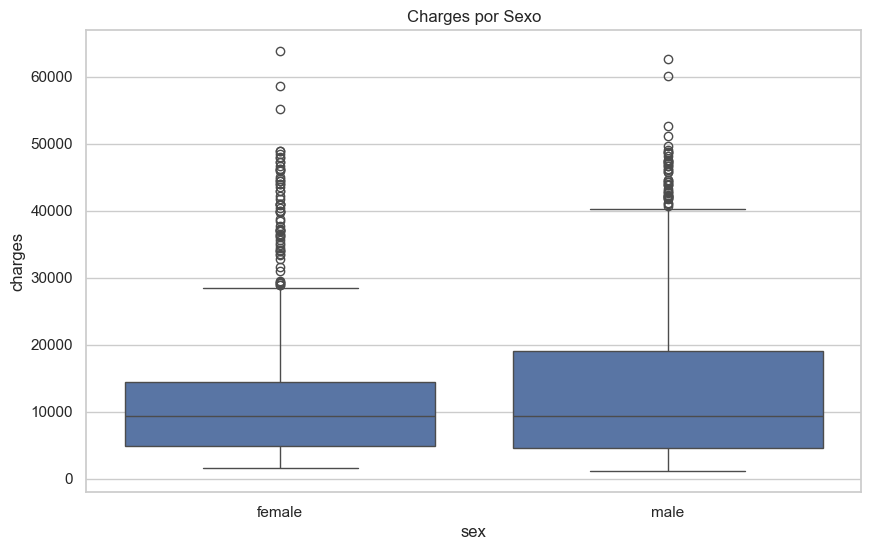

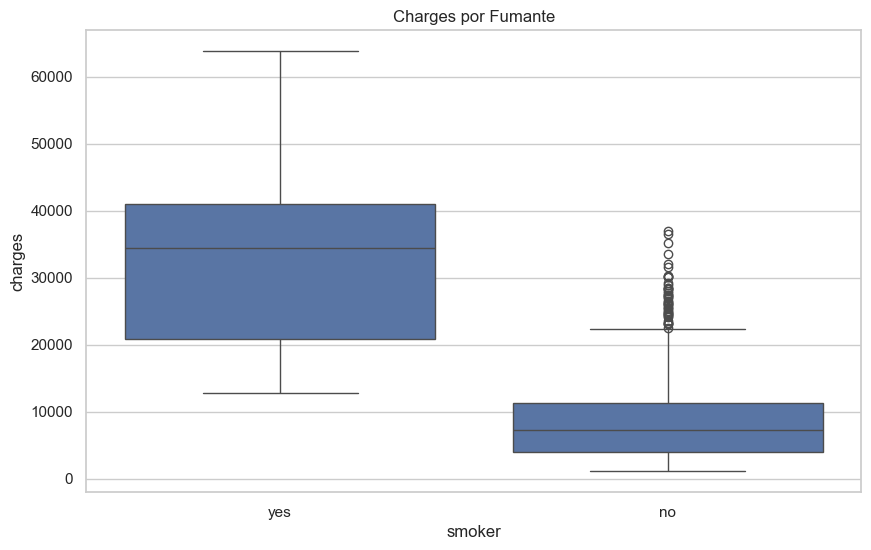

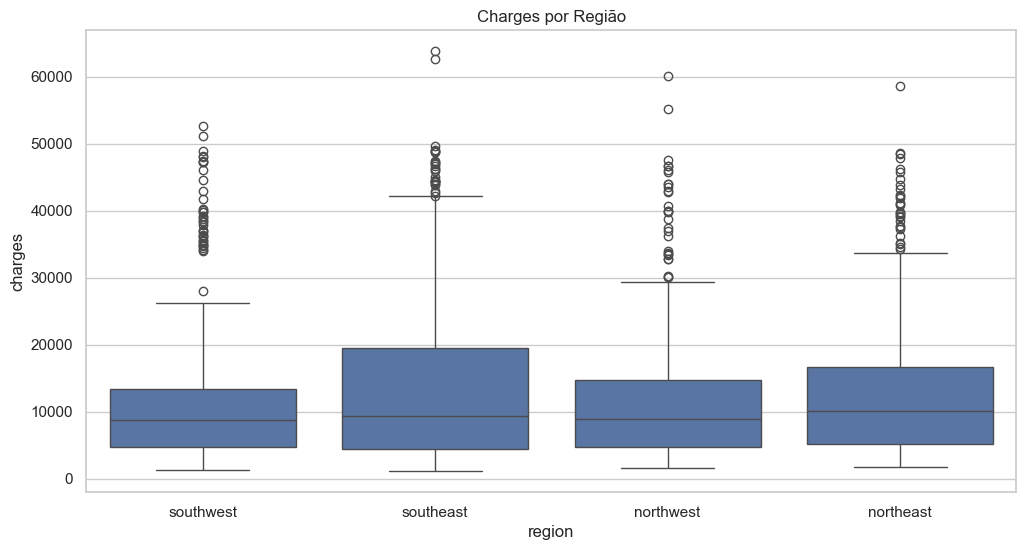

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(x="sex", y="charges", data=df)
plt.title("Charges por Sexo")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x="smoker", y="charges", data=df)
plt.title("Charges por Fumante")
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x="region", y="charges", data=df)
plt.title("Charges por Região")
plt.show()

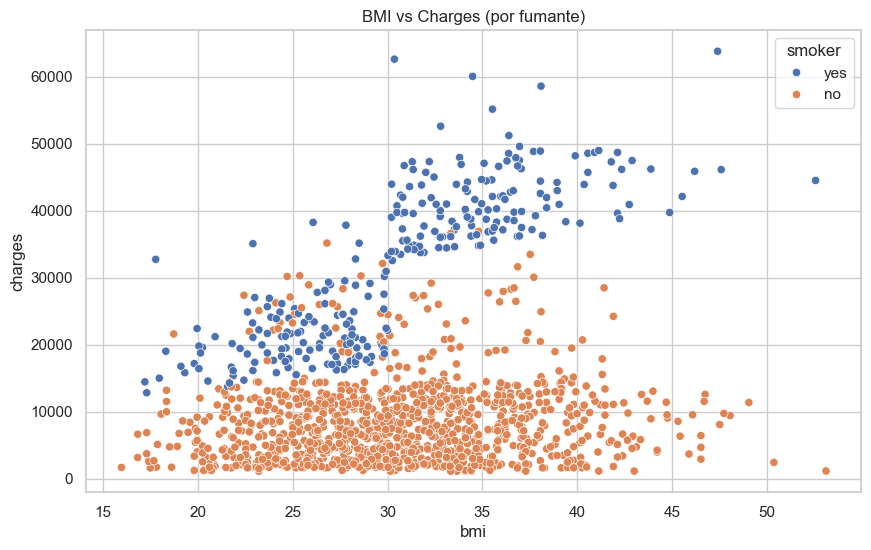

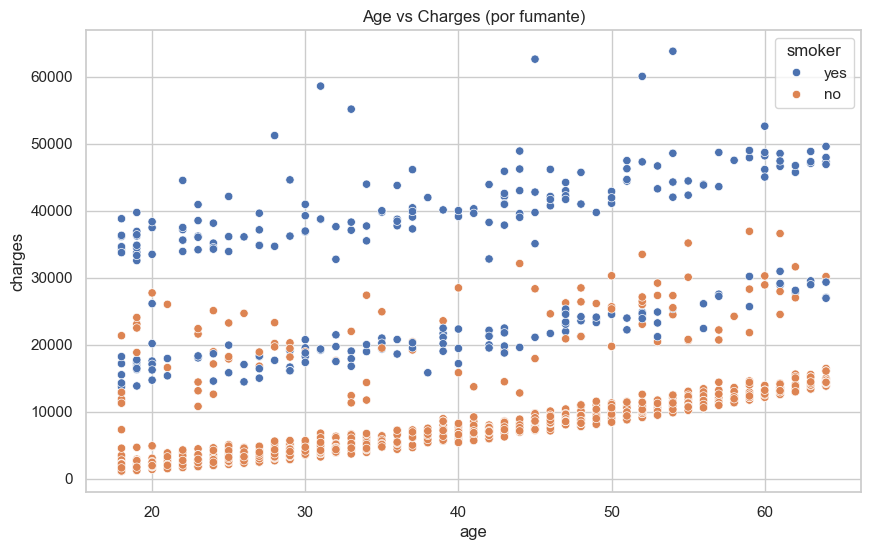

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="bmi", y="charges", hue="smoker", data=df)
plt.title("BMI vs Charges (por fumante)")
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(x="age", y="charges", hue="smoker", data=df)
plt.title("Age vs Charges (por fumante)")
plt.show()

## Modeling Analysis

In [22]:
df_encoded = pd.get_dummies(df, drop_first=True)

df_encoded.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [24]:
X = df_encoded.drop("charges", axis=1)
y = df_encoded["charges"]

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression

# Criar o modelo
lr_model = LinearRegression()

# Treinar o modelo
lr_model.fit(X_train, y_train)

LinearRegression()

In [30]:
y_pred_lr = lr_model.predict(X_test)

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Performance:")
print(f"RMSE: {rmse_lr:.2f}")
print(f"MAE: {mae_lr:.2f}")
print(f"R²: {r2_lr:.2f}")

Linear Regression Performance:
RMSE: 5796.28
MAE: 4181.19
R²: 0.78


### Polynomial Regression

In [34]:
from sklearn.preprocessing import PolynomialFeatures

# Criar transformador polinomial grau 2
poly = PolynomialFeatures(degree=2)

# Transformar dados de treino e teste
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [36]:
poly_model = LinearRegression()

# Treinar com dados polinomiais
poly_model.fit(X_train_poly, y_train)

LinearRegression()

In [38]:
y_pred_poly = poly_model.predict(X_test_poly)

In [40]:
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
mae_poly = mean_absolute_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Polynomial Regression Performance:")
print(f"RMSE: {rmse_poly:.2f}")
print(f"MAE: {mae_poly:.2f}")
print(f"R²: {r2_poly:.2f}")

Polynomial Regression Performance:
RMSE: 4570.41
MAE: 2728.32
R²: 0.87


### Ridge Regression

In [42]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [44]:
alpha_range = {'alpha': [0.01, 0.1, 1, 10, 100]}

In [46]:
ridge = Ridge()

# Grid Search com cross-validation
ridge_grid = GridSearchCV(ridge, alpha_range, cv=5, scoring='neg_mean_squared_error')

In [48]:
ridge_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [50]:
best_alpha = ridge_grid.best_params_['alpha']
print("Best alpha:", best_alpha)

Best alpha: 1


In [52]:
# Modelo final com melhor alpha
ridge_best = Ridge(alpha=best_alpha)
ridge_best.fit(X_train, y_train)

# Prever
y_pred_ridge = ridge_best.predict(X_test)

# Métricas
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression Performance:")
print(f"RMSE: {rmse_ridge:.2f}")
print(f"MAE: {mae_ridge:.2f}")
print(f"R²: {r2_ridge:.2f}")

Ridge Regression Performance:
RMSE: 5800.43
MAE: 4193.59
R²: 0.78


## Hyperparameter Tuning

Description
To optimize the Ridge Regression model, we conducted a grid search over a range of alpha values. The hyperparameter alpha controls the regularization strength, which can help prevent overfitting by penalizing large coefficients.
Impact on Model Performance
After selecting alpha=1.0, we trained the final Ridge model and evaluated it on the test set:

RMSE: ~5800

MAE: ~4194

R²: ~0.78

Compared to Linear Regression, the Ridge model yielded very similar metrics, suggesting that regularization did not substantially improve predictive accuracy on this dataset. This result may indicate limited overfitting in the Linear model or that additional feature engineering could be necessary to realize further performance gains.

## Conclusion

## Model Comparison and Conclusion

| Model                  | RMSE    | MAE     | R²   |
|------------------------|---------|---------|------|
| **Linear Regression**  | 5796.28 | 4181.19 | 0.78 |
| **Polynomial Regression** | 4570.41 | 2728.32 | 0.87 |
| **Ridge Regression**   | 5800.43 | 4193.59 | 0.78 |

**Conclusion:**  
Among all tested models, Polynomial Regression demonstrated the best performance with the lowest RMSE and MAE, and the highest R² score. This indicates that it was able to fit the underlying data relationships more accurately than Linear or Ridge Regression.

**Notes:**  
- The results show that adding polynomial terms improved predictive accuracy significantly.
- Ridge regularization did not yield notable improvements compared to simple linear regression.
- For further optimization, additional feature engineering and hyperparameter tuning could be considered.